In [1]:
from urllib.request import urlopen
import json
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
from itertools import product
import matplotlib.pyplot as plt
from sklearn import decomposition
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)


In [2]:
import pandas as pd

# Replace the file path with the path to your TSV file
file_path = r"C:\Users\Dhrumil\Desktop\SJSU\data230 v\data viz proj\34658-0001-Data.tsv"

# Use the read_csv() function from pandas to read in the TSV file
df = pd.read_csv(file_path, sep='\t')

# Print the first 5 rows of the DataFrame to verify it was loaded correctly
df.head()

,CASEID,CLASSID,SCHOOLID,CITYID,SRVDAT1_M,SRVDAT1_Y,SRVDAT1_D,SRVDAT2_M,SRVDAT2_Y,SRVDAT2_D,...,AWEIGHT,PWEIGHT,LMCITY,STOWN,FWALL,FWLMCITY,FWSTOWN,FWTOT,FWTOTLM,FWTOTST
0,101001,10101,10101,1000003,10,2006,-8,10,2006,-8,...,1.0,1.0,0,1,0.825625,0.0,0.7921,0.951486,0.0,0.884269
1,101002,10101,10101,1000003,10,2006,-8,10,2006,-8,...,1.0,1.0,0,1,0.825625,0.0,0.7921,0.951486,0.0,0.884269
2,101003,10101,10101,1000003,10,2006,-8,10,2006,-8,...,1.0,1.0,0,1,0.825625,0.0,0.7921,0.951486,0.0,0.884269
3,101004,10101,10101,1000003,10,2006,-8,10,2006,-8,...,1.0,1.0,0,1,0.825625,0.0,0.7921,0.951486,0.0,0.884269
4,101005,10101,10101,1000003,10,2006,-8,10,2006,-8,...,1.0,1.0,0,1,0.825625,0.0,0.7921,0.951486,0.0,0.884269


In [3]:
trauma = ["VICASSAP","VICBULLP", "GETALFA", "GETALMO", \
          "LIFEEV01","LIFEEV02", "LIFEEV03", "LIFEEV04", \
          "LIFEEV05", "LIFEEV06", "LIFEEV07", "LIFEEV08"]

In [4]:
for i, student in df.iterrows():
    traumascore = 0
    for j in trauma:
        if j == "GETALFA" or j == "GETALMO":
            if student[j] == 8 or student[j] == 1:
                traumascore += 1
            continue
        else:
            if student[j] not in [7,9]:
                traumascore += student[j]

    df.loc[i, "Trauma"] = traumascore

In [5]:
delin = ["VANDLTP", "BURGLTP", "BICTLTP", "CARTLTP", \
         "CARBLTP", "SNATLTP", "WEAPLTP", "EXTOLTP", \
         "GFIGLTP", "ASLTLTP", "DRUDLTP", "HACKLTP", \
         "SHOPLTP"] 

In [6]:
for i, student in df.iterrows():
    delinscore = 0
    for j in delin:
        if student[j] not in [7,9]:
            delinscore += student[j]
    df.loc[i, "Delinquency"] = delinscore

In [7]:
dim = ["VANDLTP", "BURGLTP", "BICTLTP", "CARTLTP", \
       "CARBLTP", "SNATLTP", "WEAPLTP", "EXTOLTP", \
       "GFIGLTP", "ASLTLTP", "DRUDLTP", "WORKFATH", \
       "WORKMOTH", "GETALFA", "GETALMO", "LIFEEV01", \
       "LIFEEV02", "LIFEEV03", "LIFEEV04", "LIFEEV05", \
       "LIFEEV06", "LIFEEV07", "LIFEEV08"]

In [8]:
df.AGEGROUP.value_counts()

1    62672
2     5391
9      236
3      153
0       55
Name: AGEGROUP, dtype: int64

In [9]:
df_7_9_grade = df[(df.AGEGROUP==1)|(df.AGEGROUP==2)|(df.AGEGROUP==3)|(df.AGEGROUP==4)]

# 1

C:\Users\Dhrumil\AppData\Local\Temp\ipykernel_30236\3661905393.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_data = df_7_9_grade.groupby("SCOUNTRY")["Trauma", "Delinquency"].agg(["sum"]).reset_index().sort_values(by=("Trauma", "sum"), ascending=False)


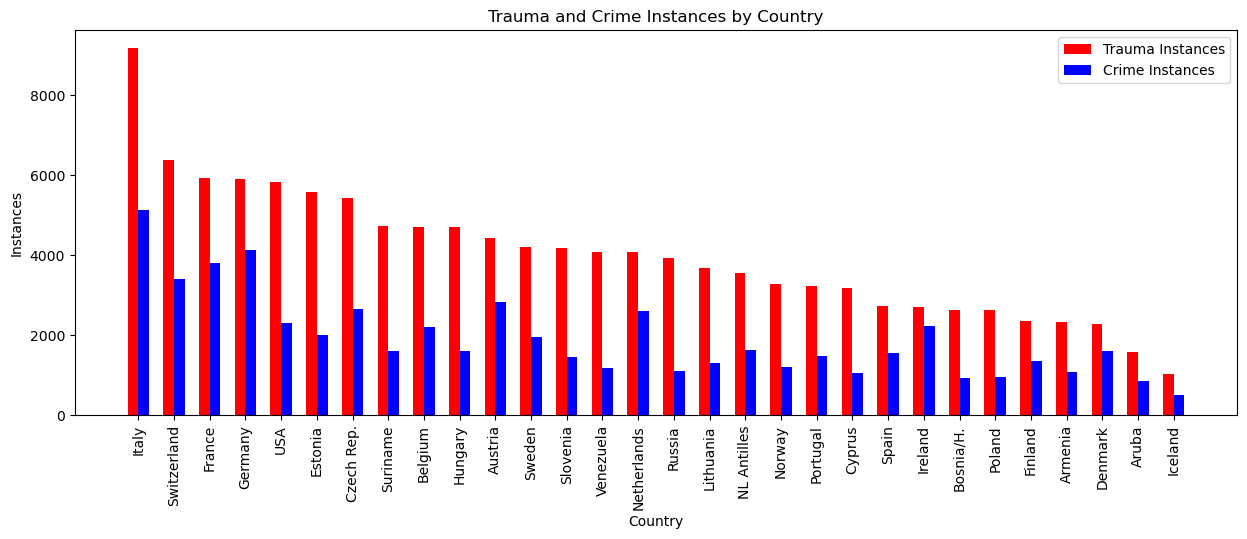

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming df_7_9_grade is a DataFrame with columns SCOUNTRY, Trauma, and Delinquency

grouped_data = df_7_9_grade.groupby("SCOUNTRY")["Trauma", "Delinquency"].agg(["sum"]).reset_index().sort_values(by=("Trauma", "sum"), ascending=False)

# Set the width of the bars and the positions of the bar groups
width = 0.3
x = np.arange(len(grouped_data))

# Create the bar plot
plt.figure(figsize=(15, 5))
plt.bar(x - width / 2, grouped_data[("Trauma", "sum")], width, label="Trauma Instances", color="r")
plt.bar(x + width / 2, grouped_data[("Delinquency", "sum")], width, label="Crime Instances", color="b")

# Set the x-axis labels and ticks
plt.xticks(x, grouped_data["SCOUNTRY"])
plt.xlabel("Country")
plt.ylabel("Instances")
plt.title("Trauma and Crime Instances by Country")

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Add a legend
plt.legend()

# Show the plot
plt.show()

### 1) What are the marks and channels?

Data : 1 Categorcial , 1 Quantitative (Derived Data)

Mark : Line(s)

Channel : 1) X-position (SCOUNTRY) horizontal for Categorical (Sum of instances) Vertically Aligned
          2) Size (Length)

Task: Compare Quantitative w.r.t categroical i.e Compare Sum of Traumatic and Criminal Cases of each country

### 2) Why do you choose these marks and channels (problem-specific not general)?

 We've chosen these marks and channels becasue the best way to compare the Quantitative variables  for different Countries namely "TRAUMA" and "CRIME"  are via plotting a side by side (double) bar graph.

 Problem - Find relation between criminal instances and trauma across nations if any.

 Solution - Plotting a double bar graph makes it easier for a person to comprehend the traumatic and criminal instances individually for a particular nation.

### 3) What do you want to show/describe from this visualization?

These graphs clearly state that the countries where the children experience trauma are more likely to commit a crime.

## Motivation -
Traumatic experiences, such as exposure to violence, humiliating/bullying someone, death of parent, relative , cousin or a loved one, seperation or conflict between parents can have a profound effect on a child's development and behavior.

These graphs clearly state that the countries where the children experience trauma are more likely to commit a crime.

By examining the relationship between trauma and delinquency, we can gain insights into how these experiences may contribute to delinquent behaviors, such as substance abuse, aggression, and other types of criminal behavior. We can also identify potential risk factors and protective factors that may influence the relationship between trauma and delinquency.

Additionally, this kind of graph can assist professionals working in the juvenile justice system in developing more efficient prevention and intervention plans. We can prevent or lessen the impact of traumatic experiences on young people's conduct by recognizing the elements that contribute to delinquency. We can also provide specialized support and treatment to those who have suffered trauma.

Overall, a trauma with delinquency graph can provide a powerful visual representation of the complex relationship between trauma and delinquency, and help to guide efforts to improve outcomes for at-risk youth.

# 2

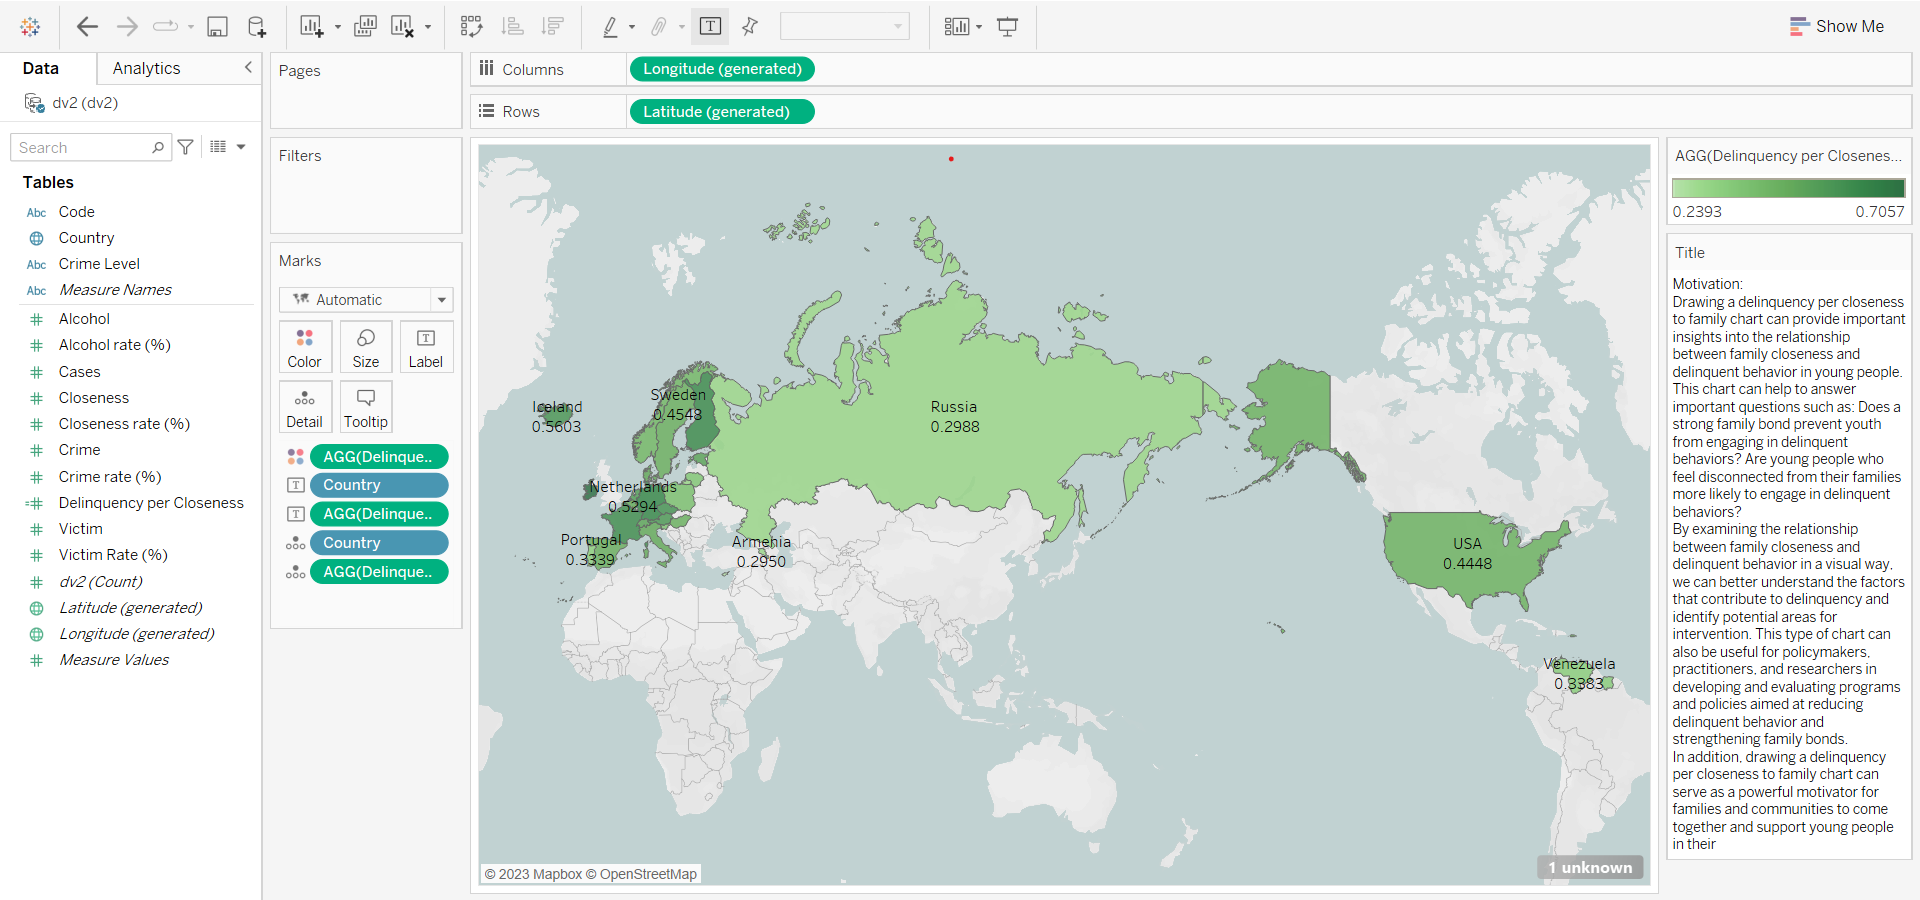

### 1) What are the marks and channels?

Data : 1 Categorcial , 1 Quantitative (Derived Data)

Mark : Item (2 Dimensional) AREA 

Channel : 1) Hue (Color)
          
Task: Communicate information about the distribution of a Delinquency per Closeness variable across different regions.

### 2) Why do you choose these marks and channels (problem-specific not general)?

We've chosen these marks and channels becasue they allowed us to represent Delinquency per Closeness variable for different countries using color scales. By doing so, we could easily identify spatial patterns, trends, and variations in the data across nations.

Problem - Find correlation between criminal behavior and Closness across nations if any.

Solution - One can easily identify regions that have high or low values of the Delinquency per Closeness parameter.
           Greater the ratio (darker the hue) in map illustrates lower the closeness to family and greater is the deliquent              behavior across that nation 

### 3) What do you want to show/describe from this visualization?

The thematic map effectively communicates complex spatial patterns and trends, and explores the relationships between delinquency per closeness and regions.
The visualization shows that Greater the delinquency ratio for a particular nation, the closesness to family diminshes and hence the deliquent behavior increases.

## Motivation -
Drawing a delinquency per closeness to family chart can provide important insights into the relationship between family closeness and delinquent behavior in young people. This chart can help to answer important questions such as: Does a strong family bond prevent youth from engaging in delinquent behaviors? Are young people who feel disconnected from their families more likely to engage in delinquent behaviors?
By examining the relationship between family closeness and delinquent behavior in a visual way, we can better understand the factors that contribute to delinquency and identify potential areas for intervention. This type of chart can also be useful for policymakers, practitioners, and researchers in developing and evaluating programs and policies aimed at reducing delinquent behavior and strengthening family bonds.
In addition, drawing a delinquency per closeness to family chart can serve as a powerful motivator for families and communities to come together and support young people in their lives. By emphasizing the importance of family closeness in preventing delinquency, this chart can help to foster a sense of connectedness and responsibility among family members and inspire them to work together to create a positive and supportive environment for young people to grow and thrive in.

# 3

In [111]:
# Most severe delinquency (violent > non-violent > no crime)
# Most severe substance used (LHC > XTC/speed > MJ/hash > spirits > beer/wine)
df_heatmap = pd.DataFrame(columns=['Delinquency', 'Type_of_Vitcim'])
sub_order = ['Something stolen', 'Bullied or Humiliated infront of everyone', 'Assaulted', "Death_cousin","Death_parent",'Death of loved one',"Illness",
              'Illness of close','Prob with parents on drug/alcohol', 'Repeated serious conflicts bet parents',"Divorcee"]
for i, student in df.iterrows():
    victim = [student["VICTHEFP"], student["VICBULLP"], student["VICASSAP"]]
    victim1 = [student["LIFEEV01"], student["LIFEEV02"], student["LIFEEV03"],student["LIFEEV04"],student["LIFEEV06"],student["LIFEEV07"], student["LIFEEV05"], student["LIFEEV08"]]
    # a person being a victim 
    
    violent = [student["ASLTLTP"], student["GFIGLTP"], student["SNATLTP"], student["VANDLTP"], student["EXTOLTP"]]  # violent crime
    non_violent = [student["BURGLTP"], student["HACKLTP"], student["SHOPLTP"], student["BICTLTP"], student["CARTLTP"]] # non-violent crime
    substances = list(np.concatenate(list(np.array([victim, victim1]).flat)).flat)
    relevant_data = list(np.concatenate(list(np.array([victim, victim1, violent, non_violent]).flat)).flat)

    if not any(x in relevant_data for x in [-9, 97, 9, 7, 99]): # Ignore blank/ambigious/no answers

        if any(x in victim for x in [1])or any(x in victim1 for x in [1]):    
            for j, e in enumerate(substances):
                if e in [1]:
                    df_heatmap.loc[i,'Type_of_Vitcim'] = sub_order[j]
        
        if any(x in violent for x in [1]) or any(x in non_violent for x in [0]):
            df_heatmap.loc[i,'Delinquency'] = "Violent crimes"
            if any(x in non_violent for x in [1]):
                df_heatmap.loc[i,'Delinquency'] = "Non-violent crimes"        
        


print(df_heatmap.loc[5:10,'Type_of_Vitcim'])


5                                        NaN
6                         Death of loved one
8     Repeated serious conflicts bet parents
9                                        NaN
10    Repeated serious conflicts bet parents
Name: Type_of_Vitcim, dtype: object


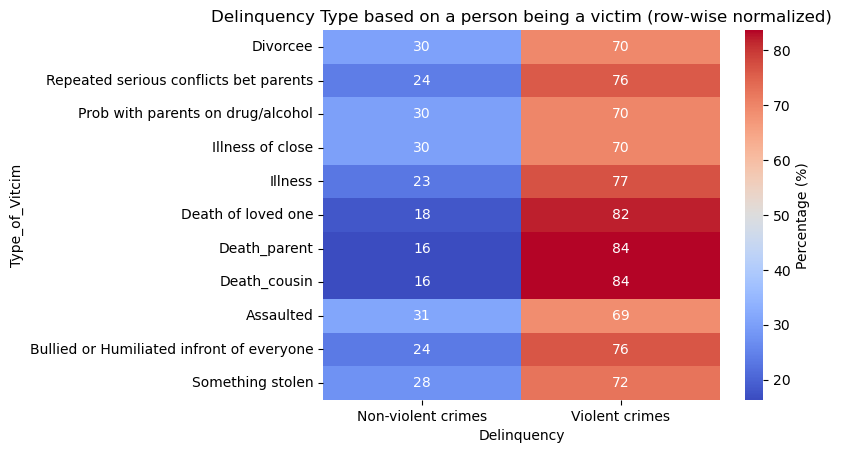

In [112]:
confusion_matrix = pd.crosstab(df_heatmap['Type_of_Vitcim'], df_heatmap['Delinquency'], normalize='index')*100
confusion_matrix = confusion_matrix.reindex(sub_order[::-1], axis="rows")
sns.heatmap(confusion_matrix, annot=True, cbar_kws={'label': 'Percentage (%)'}, cmap='coolwarm')
#print(confusion_matrix)
plt.title('Delinquency Type based on a person being a victim (row-wise normalized)')
plt.show()

### 1) What are the marks and channels?

Data : 2 Categorcial (Type of Victim & Delinquency type) , 1 Quantitative (Derived Data)

Mark : Item (2 Dimensional) AREA 

Channel : 1) Hue (Color)
          2) x-axis (Horizonatal deliquency) and y-axis ( Vertical Vitcim Type): These channels are used to map the position of each data point in the 2-dimensional grid.

          
Task: Coorelate the percentage of deliquent activities ( Violent and Non Violent) for a particular victim type.

### 2) Why do you choose these marks and channels (problem-specific not general)?

We've chosen these marks and channels becasue here the intensity of the color represents the magnitude of the deliquent type being committed. Heatmaps can be used to identify patterns and trends in datasets.
Here they effectively convey that percent of deliquent type of crime for a particular victim type, i.e Violent crimes are majorly committed by people when they become a victim.

Problem - Find correlation between criminal behavior and Closness across nations if any.

Solution -  Heatmap displays numerical data as a color-encoded matrix. Heatmaps are commonly used to represent the magnitude of values in a two-dimensional matrix, where the values are represented by different colors. The color gradient helps to quickly identify areas of high and low values in the matrix, making it easier to fathom patterns and trends.

### 3) What do you want to show/describe from this visualization?

The thematic map effectively communicates complex spatial patterns and trends, and explores the relationships between delinquency per closeness and regions.
The visualization shows that Greater the delinquency ratio for a particular nation, the closesness to family diminshes and hence the deliquent behavior increases.

## Motivation -

Traumatic experiences such as exposure to violence, getting humiliated/bullied by someone, death of parent, relative , cousin or a loved one, seperation or conflict between parents have been shown to increase the risk of delinquent behaviors among children. By examining the relationship between trauma and delinquency through a heatmap, we can gain insights into the complex interplay between these factors and the potential risk and protective factors that influence them.

Taking every type of traumatic experience we can see from the heatmap that if a person experiences some traumatic experience he/she commits a violent crime the most.

In addition, a heatmap can help to identify potential gaps in our understanding of the relationship between trauma and delinquency, and guide future research in this area. By highlighting areas where there is a lack of data or conflicting results, we can prioritize research efforts to fill these gaps and improve our understanding of the mechanisms underlying the link between trauma and delinquency.

By understanding the factors that contribute to delinquency, we can work to spread awareness and improve outcomes for at-risk youth and create safer, healthier communities for everyone.

In [64]:
import pandas as pd

# Replace the file path with the path to your TSV file
file_path = r"C:\Users\Dhrumil\Desktop\SJSU\data230 v\data viz proj\dv1.csv"

# Use the read_csv() function from pandas to read in the TSV file
df1 = pd.read_csv(file_path, sep=',')

# Print the first 5 rows of the DataFrame to verify it was loaded correctly
df1.tail()

,COUNTRY,CODE
220,Zambia,ZMB
221,Zimbabwe,ZWE
222,USA,USA
223,Bosnia/H.,BIH
224,Czech Rep.,CZE


In [65]:
df1['Cases']  = 0      
df1['Males']  = 0      
df1["Male_6th"] = 0
df1["Male_7th"] = 0
df1["Male_8th"] = 0
df1["Male_9th"] = 0
df1['Females']  = 0      
df1["Female_6th"] = 0
df1["Female_7th"] = 0
df1["Female_8th"] = 0
df1["Female_9th"] = 0

In [66]:
df.MALE.value_counts()

0    34583
1    33758
9      154
7       12
Name: MALE, dtype: int64

In [67]:
for i, student in df.iterrows():
    country = student["SCOUNTRY"]
    gender = student["MALE"]
    age = student["AGEGROUP"]
    # relevant_data = list(np.concatenate(list(np.array([alcohol, gotdrunk, violent, non_violent, victim, closeness]).flat)).flat)

    if country in df1['COUNTRY'].values:
        country_index = df1.index[df1['COUNTRY'] == country][0]
        df1.loc[country_index, 'Cases'] += 1
        if any(x in [gender] for x in [1]) and any(x in [age] for x in [1,2,3,4]):
            df1.loc[country_index, 'Males'] += 1
        if any(x in [gender] for x in [1]) and any(x in [age] for x in [1]):
            df1.loc[country_index, 'Male_6th'] += 1
        if any(x in [gender] for x in [1]) and any(x in [age] for x in [2]):
            df1.loc[country_index, 'Male_7th'] += 1
        if any(x in [gender] for x in [1]) and any(x in [age] for x in [3]):
            df1.loc[country_index, 'Male_8th'] += 1
        if any(x in [gender] for x in [1]) and any(x in [age] for x in [4]):
            df1.loc[country_index, 'Male_9th'] += 1
        if any(x in [gender] for x in [0]) and any(x in [age] for x in [1,2,3,4]):
            df1.loc[country_index, 'Females'] += 1
        if any(x in [gender] for x in [0]) and any(x in [age] for x in [1]):
            df1.loc[country_index, 'Female_6th'] += 1
        if any(x in [gender] for x in [0]) and any(x in [age] for x in [2]):
            df1.loc[country_index, 'Female_7th'] += 1
        if any(x in [gender] for x in [0]) and any(x in [age] for x in [3]):
            df1.loc[country_index, 'Female_8th'] += 1
        if any(x in [gender] for x in [0]) and any(x in [age] for x in [4]):
            df1.loc[country_index, 'Female_9th'] += 1

In [68]:
for i, country in df1.iterrows():
    count = country["Cases"]
    if count == 0:
        df1 = df1.drop(i)

In [69]:
df1.head()

,COUNTRY,CODE,Cases,Males,Male_6th,Male_7th,Male_8th,Male_9th,Females,Female_6th,Female_7th,Female_8th,Female_9th
9,Armenia,ARM,2044,933,918,15,0,0,1107,1090,17,0,0
10,Aruba,ABW,705,326,282,44,0,0,375,317,56,2,0
12,Austria,AUT,2994,1472,1346,125,1,0,1515,1405,109,1,0
19,Belgium,BEL,2308,1191,1048,136,7,0,1110,998,106,6,0
53,Cyprus,CYP,2310,1122,1103,19,0,0,1166,1159,7,0,0


In [83]:
male_sum = df1['Males'].sum()
female_sum = df1['Females'].sum()
Male_6th_sum = df1["Male_6th"].sum()
Male_7th_sum = df1["Male_7th"].sum()
Male_8th_sum = df1["Male_8th"].sum()

female_sum = df1['Females'].sum()
Female_6th_sum = df1["Female_6th"].sum()
Female_7th_sum = df1["Female_7th"].sum()
Female_8th_sum = df1["Female_8th"].sum()

total = male_sum + female_sum

In [88]:
outer = [(Male_6th_sum/total * 100), (Male_7th_sum/total * 100), (Male_8th_sum/total * 100), (Female_6th_sum/total * 100),(Female_7th_sum/total * 100),(Female_8th_sum/total * 100)] 

In [128]:
index = ["6th", "7th", "8th"]

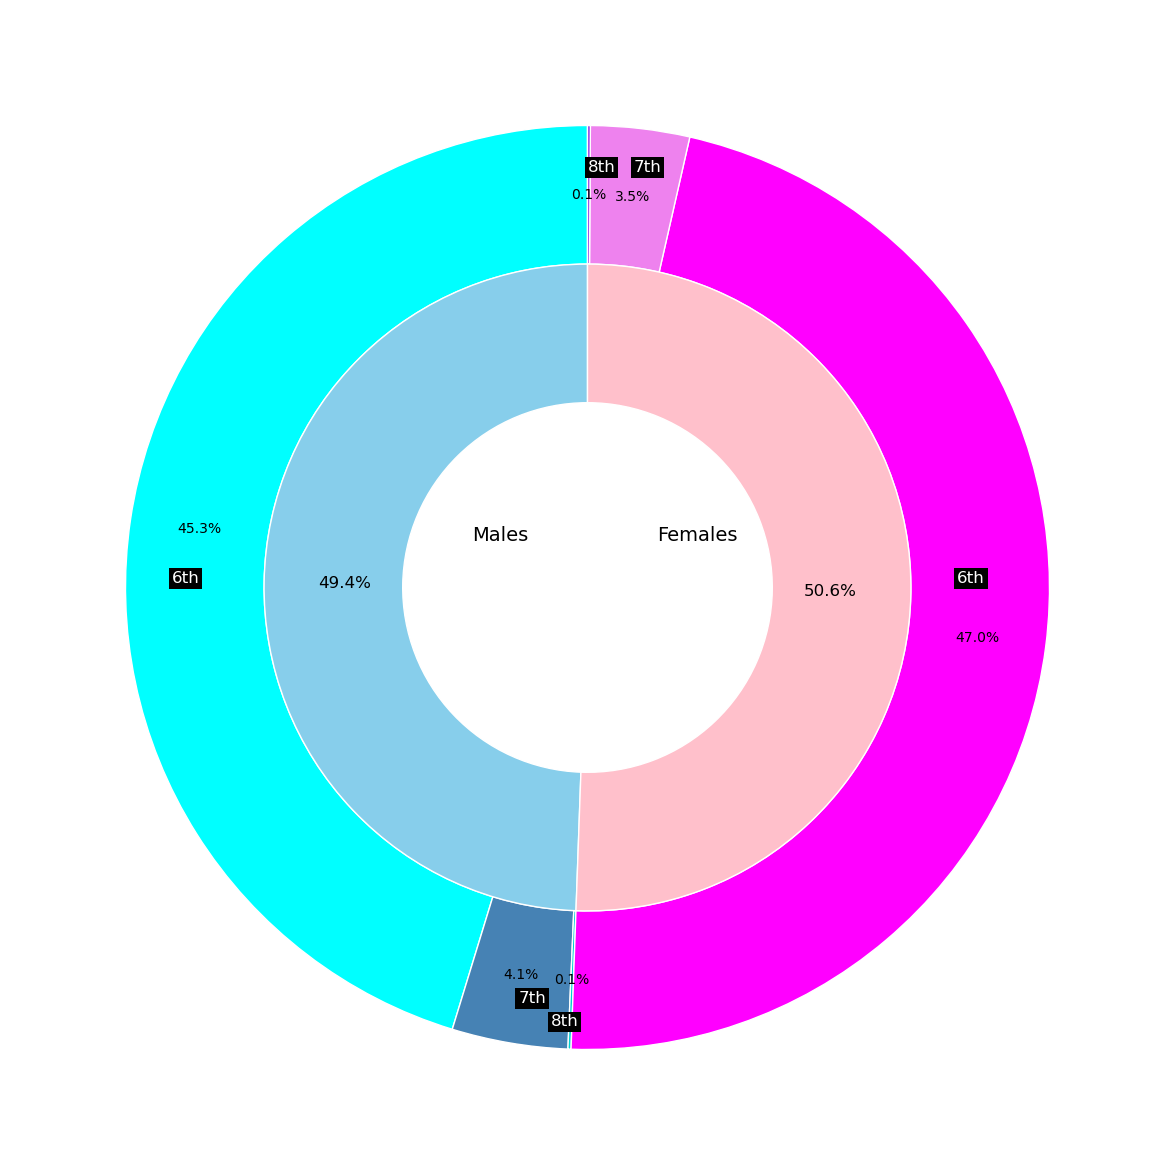

In [155]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


fig, ax = plt.subplots(figsize=(15, 15))
total_data = [df1['Males'].sum(), df1['Females'].sum()]

male_data = df1['Males'].tolist()
female_data = df1['Females'].tolist()

# Normalize data to create a color map
male_norm = np.array(male_data) / sum(male_data)
female_norm = np.array(female_data) / sum(female_data)

# Create color maps for males (blue) and females (pink)
male_colors = plt.cm.Blues(male_norm)
female_colors = plt.cm.PuRd(female_norm)

# Plot outer pie chart first
outer_colors = ['cyan', "steelblue", "darkturquoise", "magenta" ,'violet', 'blueviolet']
wedges, _, autotexts = ax.pie(outer, colors=outer_colors,
                      radius=1, startangle=90, autopct='%1.1f%%',
                      wedgeprops=dict(width=0.3, edgecolor='w'), pctdistance=0.85)

# Change the font size of percentage labels
for autotext in autotexts:
    autotext.set_fontsize(10)

# Add outer labels manually using ax.text()
label_positions = [(-0.9, 0.01), (-0.15, -0.9), (-0.08, -0.95),
                  (0.8, 0.01), (0.1, 0.9), (-0.0, 0.9)]

for pos, label in zip(label_positions, index * 2):

    ax.text(pos[0], pos[1], label, fontsize=12, color='white', backgroundcolor='black', bbox=dict(facecolor='black', edgecolor='none', pad=2))

# Plot inner pie chart on top of the outer pie chart
inner_colors = ['skyblue', 'pink']
wedges, _, autotexts = ax.pie(total_data, colors=inner_colors, startangle=90, autopct='%1.1f%%',
                                 wedgeprops=dict(width=0.3, edgecolor='w'), radius=0.7, pctdistance=0.75)

# Change the font size of percentage labels
for autotext in autotexts:
    autotext.set_fontsize(12)

# Add inner labels manually using ax.text()
inner_label_positions = [(-0.25, 0.1), (0.15, 0.1)]
for pos, label in zip(inner_label_positions, ['Males', 'Females']):
    ax.text(pos[0], pos[1], label, fontsize=14)

plt.show()

### 1) What are the marks and channels?

Data : 2 Categorcial (Gender, Grade) , 1 Quantitative (Derived Data Grade,Gender Percent)

Mark : Area radially seperated with uniform height

Channel : 1) Hue (Color)
         
         2)Angle (2d Area)
           
Task: Part to whole judgement of Young males and females commiting Crimes.

### 2) Why do you choose these marks and channels (problem-specific not general)?

We've chosen these marks and channels becasue the concentric pie chart displays hierarchical data using concentric circles. The chart is divided into multiple rings, with each ring representing a category (Male/Female)  The size of each ring is proportional to the percent of the data it represents.

Problem - Find the percent of Male/Female committing Deliquent activity at a particular age.
Solution - Type of data visualization that displays hierarchical data using concentric circles helps an individual to effectively fathom and makes it visaually appealing in conveying the percentage of males and females individually commiting crime.
Greater the area in the nested piechart indicates that a particular gender in a particular grade committing greater number of crimes.

### 3) What do you want to show/describe from this visualization?
Nested Pie chart is one of the effective tool for gaining insights into patterns and trends related to juvenile delinquency pertaining to finding percent of population commiting crime and distinguishing them on the basis of gender and grade.
The smaller areas in the nested pie chart indicate that a specific gender in a particular grade has committed a lower number of crimes.


## MOTIVATION -

A nested pie chart of delinquency vs gender of different age groups can be a useful visualization to explore patterns and trends related to juvenile delinquency. This type of chart can help identify which age groups have higher rates of delinquency, and whether there are differences in delinquency rates between males and females within each age group.

The chart can be particularly useful for policy-makers, law enforcement agencies, and social workers who are working to prevent and address juvenile delinquency. By identifying the specific age groups and gender categories that are most affected by delinquency, interventions can be better targeted to address the root causes and reduce the prevalence of delinquency.

Additionally, the chart can be informative for researchers and analysts who are studying delinquency trends and trying to identify the factors that contribute to delinquent behavior. The chart can reveal whether there are differences in delinquency rates between males and females at different stages of development, and whether certain risk factors are more prevalent among one gender or age group.

Overall, a nested pie chart of delinquency vs gender of different age groups can be a powerful tool for gaining insights into patterns and trends related to juvenile delinquency, and for informing targeted interventions and policies to prevent and address delinquent behavior.